In [10]:
#import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read and clean results.csv file

In [11]:
results = pd.read_csv("F1_data/results.csv")
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25655,25661,1086,825,210,20,13,16,16,16,0.0,69,\N,\N,37,15,1:23.511,188.856,11
25656,25662,1086,848,3,23,17,17,17,17,0.0,69,\N,\N,43,12,1:23.047,189.911,11
25657,25663,1086,849,3,6,19,18,18,18,0.0,69,\N,\N,60,8,1:22.478,191.221,11
25658,25664,1086,852,213,22,16,19,19,19,0.0,68,\N,\N,58,16,1:23.538,188.795,12


In [12]:
results.columns = results.columns.str.strip()

In [13]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [14]:
results = results.replace("\\N", np.nan)

In [15]:
results = results.dropna(subset = "fastestLapTime")

In [16]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25655,25661,1086,825,210,20,13,16,16,16,0.0,69,NaN,NaN,37,15,1:23.511,188.856,11
25656,25662,1086,848,3,23,17,17,17,17,0.0,69,NaN,NaN,43,12,1:23.047,189.911,11
25657,25663,1086,849,3,6,19,18,18,18,0.0,69,NaN,NaN,60,8,1:22.478,191.221,11
25658,25664,1086,852,213,22,16,19,19,19,0.0,68,NaN,NaN,58,16,1:23.538,188.795,12


### Read and clean drivers.csv file

In [17]:
drivers = pd.read_csv('F1_data/drivers.csv')
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


In [18]:
drivers.columns = drivers.columns.str.strip()

In [19]:
drivers = drivers[['driverId','forename','surname','nationality']]
drivers

,driverId,forename,surname,nationality
0,1,Lewis,Hamilton,British
1,2,Nick,Heidfeld,German
2,3,Nico,Rosberg,German
3,4,Fernando,Alonso,Spanish
4,5,Heikki,Kovalainen,Finnish
...,...,...,...,...
849,851,Jack,Aitken,British
850,852,Yuki,Tsunoda,Japanese
851,853,Nikita,Mazepin,Russian
852,854,Mick,Schumacher,German


### Read and clean races.csv file

In [20]:
races = pd.read_csv('F1_data/races.csv')
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1092,2022,18,22,Japanese Grand Prix,2022-10-09,05:00:00,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,2022-10-07,04:00:00,2022-10-07,08:00:00,2022-10-08,04:00:00,2022-10-08,07:00:00,\N,\N
1075,1093,2022,19,69,United States Grand Prix,2022-10-23,19:00:00,http://en.wikipedia.org/wiki/2022_United_State...,2022-10-21,19:00:00,2022-10-21,22:00:00,2022-10-22,19:00:00,2022-10-22,22:00:00,\N,\N
1076,1094,2022,20,32,Mexico City Grand Prix,2022-10-30,20:00:00,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,2022-10-28,18:00:00,2022-10-28,21:00:00,2022-10-29,17:00:00,2022-10-29,20:00:00,\N,\N
1077,1095,2022,21,18,Brazilian Grand Prix,2022-11-13,18:00:00,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,2022-11-11,15:30:00,2022-11-12,15:30:00,\N,\N,2022-11-11,19:00:00,2022-11-12,19:30:00


In [21]:
races.columns = races.columns.str.strip()

In [22]:
races = races.drop(['url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],axis=1)

In [23]:
races

,raceId,year,round,circuitId,name,date,time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00
...,...,...,...,...,...,...,...
1074,1092,2022,18,22,Japanese Grand Prix,2022-10-09,05:00:00
1075,1093,2022,19,69,United States Grand Prix,2022-10-23,19:00:00
1076,1094,2022,20,32,Mexico City Grand Prix,2022-10-30,20:00:00
1077,1095,2022,21,18,Brazilian Grand Prix,2022-11-13,18:00:00


### Read and clean circuits.csv file 

In [24]:
circuits = pd.read_csv('F1_data/circuits.csv')
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
71,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
72,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
73,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
74,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


In [25]:
circuits = circuits[['circuitId','circuitRef','name','location','country']]
circuits

,circuitId,circuitRef,name,location,country
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain
4,5,istanbul,Istanbul Park,Istanbul,Turkey
...,...,...,...,...,...
71,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal
72,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy
73,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia
74,78,losail,Losail International Circuit,Al Daayen,Qatar


### Read and clean lap_times.csv file

In [26]:
lap_times = pd.read_csv('F1_data/lap_times.csv')
lap_times

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
528780,1086,842,65,13,1:25.989,85989
528781,1086,842,66,12,1:25.187,85187
528782,1086,842,67,12,1:47.355,107355
528783,1086,842,68,12,1:37.587,97587


In [27]:
lap_times = lap_times[['raceId','driverId','lap','position','time','milliseconds']]
lap_times

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
528780,1086,842,65,13,1:25.989,85989
528781,1086,842,66,12,1:25.187,85187
528782,1086,842,67,12,1:47.355,107355
528783,1086,842,68,12,1:37.587,97587


# Q1. Who has the highest number of fastest lap times across every circuit?

In [28]:
fast_lap_time = circuits.merge(races, on = 'circuitId', how  = 'left') 
fast_lap_time = fast_lap_time.merge(results, on = 'raceId', how = 'left')
fast_lap_time = fast_lap_time.merge(drivers, on = 'driverId', how = 'left')
fast_lap_time.rename(columns={'name_x':'circuitName'}, inplace=True)
fast_lap_time = fast_lap_time[['circuitName','country','forename','surname','fastestLapTime','year']]

fast_lap_time = fast_lap_time.replace('\\N',np.nan)
fast_lap_time = fast_lap_time.dropna()
fast_lap_time

,circuitName,country,forename,surname,fastestLapTime,year
0,Albert Park Grand Prix Circuit,Australia,Jenson,Button,1:28.020,2009
1,Albert Park Grand Prix Circuit,Australia,Rubens,Barrichello,1:29.066,2009
2,Albert Park Grand Prix Circuit,Australia,Jarno,Trulli,1:28.916,2009
3,Albert Park Grand Prix Circuit,Australia,Timo,Glock,1:28.416,2009
4,Albert Park Grand Prix Circuit,Australia,Fernando,Alonso,1:28.712,2009
...,...,...,...,...,...,...
7924,Miami International Autodrome,USA,Kevin,Magnussen,1:33.511,2022
7925,Miami International Autodrome,USA,Sebastian,Vettel,1:33.479,2022
7926,Miami International Autodrome,USA,Pierre,Gasly,1:34.487,2022
7927,Miami International Autodrome,USA,Lando,Norris,1:33.411,2022


In [29]:
fast_lap_time['fastest_recorded_lap'] = fast_lap_time.groupby(['circuitName'])['fastestLapTime'].transform('min')
fastest = fast_lap_time[fast_lap_time['fastest_recorded_lap']==fast_lap_time['fastestLapTime']].reset_index()
fastest

,index,circuitName,country,forename,surname,fastestLapTime,year,fastest_recorded_lap
0,322,Albert Park Grand Prix Circuit,Australia,Charles,Leclerc,1:20.260,2022,1:20.260
1,622,Sepang International Circuit,Malaysia,Sebastian,Vettel,1:34.080,2017,1:34.080
2,972,Bahrain International Circuit,Bahrain,George,Russell,0:55.404,2020,0:55.404
3,1104,Circuit de Barcelona-Catalunya,Spain,Giancarlo,Fisichella,1:15.641,2005,1:15.641
4,1502,Istanbul Park,Turkey,Juan,Pablo Montoya,1:24.770,2005,1:24.770
5,1994,Circuit de Monaco,Monaco,Lewis,Hamilton,1:12.909,2021,1:12.909
6,2346,Circuit Gilles Villeneuve,Canada,Valtteri,Bottas,1:13.078,2019,1:13.078
7,2462,Circuit de Nevers Magny-Cours,France,Michael,Schumacher,1:15.377,2004,1:15.377
8,2594,Silverstone Circuit,UK,Michael,Schumacher,1:18.739,2004,1:18.739
9,3011,Hockenheimring,Germany,Kimi,Räikkönen,1:13.780,2004,1:13.780


In [30]:
fastest.drop(['index','fastest_recorded_lap'], axis=1)

,circuitName,country,forename,surname,fastestLapTime,year
0,Albert Park Grand Prix Circuit,Australia,Charles,Leclerc,1:20.260,2022
1,Sepang International Circuit,Malaysia,Sebastian,Vettel,1:34.080,2017
2,Bahrain International Circuit,Bahrain,George,Russell,0:55.404,2020
3,Circuit de Barcelona-Catalunya,Spain,Giancarlo,Fisichella,1:15.641,2005
4,Istanbul Park,Turkey,Juan,Pablo Montoya,1:24.770,2005
5,Circuit de Monaco,Monaco,Lewis,Hamilton,1:12.909,2021
6,Circuit Gilles Villeneuve,Canada,Valtteri,Bottas,1:13.078,2019
7,Circuit de Nevers Magny-Cours,France,Michael,Schumacher,1:15.377,2004
8,Silverstone Circuit,UK,Michael,Schumacher,1:18.739,2004
9,Hockenheimring,Germany,Kimi,Räikkönen,1:13.780,2004


C:\Users\Kashyap Mistry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Drivers'),
 Text(0, 0.5, 'Number of wins'),
 Text(0.5, 1.0, 'Drivers with fastest lap time')]

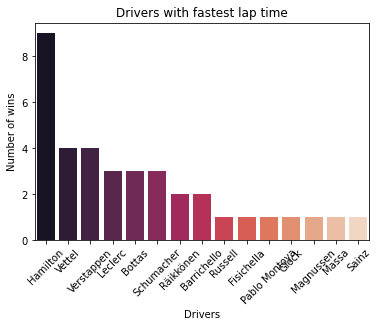

In [31]:
fastest_viz = fastest.surname.value_counts().rename_axis('driver').reset_index(name= 'fastest laps')
x = fastest_viz['driver']
y = fastest_viz['fastest laps']
chart = sns.barplot(x, y, palette = 'rocket')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set(xlabel = 'Drivers', ylabel = 'Number of wins', title = 'Drivers with fastest lap time')

# Q2. What are the changes in lap time over the years?

In [32]:
lap_time_changes = lap_times.merge(races, on = 'raceId', how  = 'left')
lap_time_changes.rename(columns={'time_x':'lapTime'},inplace=True)
lap_time_changes

,raceId,driverId,lap,position,lapTime,milliseconds,year,round,circuitId,name,date,time_y
0,841,20,1,1,1:38.109,98109,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00
1,841,20,2,1,1:33.006,93006,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00
2,841,20,3,1,1:32.713,92713,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00
3,841,20,4,1,1:32.803,92803,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00
4,841,20,5,1,1:32.342,92342,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
528780,1086,842,65,13,1:25.989,85989,2022,13,11,Hungarian Grand Prix,2022-07-31,13:00:00
528781,1086,842,66,12,1:25.187,85187,2022,13,11,Hungarian Grand Prix,2022-07-31,13:00:00
528782,1086,842,67,12,1:47.355,107355,2022,13,11,Hungarian Grand Prix,2022-07-31,13:00:00
528783,1086,842,68,12,1:37.587,97587,2022,13,11,Hungarian Grand Prix,2022-07-31,13:00:00


In [33]:
lap_time_changes = lap_time_changes[['raceId','lapTime','year','name','milliseconds']]
lap_time_changes

,raceId,lapTime,year,name,milliseconds
0,841,1:38.109,2011,Australian Grand Prix,98109
1,841,1:33.006,2011,Australian Grand Prix,93006
2,841,1:32.713,2011,Australian Grand Prix,92713
3,841,1:32.803,2011,Australian Grand Prix,92803
4,841,1:32.342,2011,Australian Grand Prix,92342
...,...,...,...,...,...
528780,1086,1:25.989,2022,Hungarian Grand Prix,85989
528781,1086,1:25.187,2022,Hungarian Grand Prix,85187
528782,1086,1:47.355,2022,Hungarian Grand Prix,107355
528783,1086,1:37.587,2022,Hungarian Grand Prix,97587


In [34]:
lap_time_changes = lap_time_changes.groupby(['year'],as_index=False)['milliseconds'].min()
lap_time_changes.columns

Index(['year', 'milliseconds'], dtype='object')

In [35]:
lap_time_changes['milliseconds'] = lap_time_changes['milliseconds']/1000
lap_time_changes = lap_time_changes.rename(columns={'milliseconds':'seconds'})
lap_time_changes

,year,seconds
0,1996,78.610
1,1997,71.814
2,1998,72.878
3,1999,72.107
4,2000,71.783
5,2001,70.843
6,2002,69.298
7,2003,68.337
8,2004,70.399
9,2005,71.497


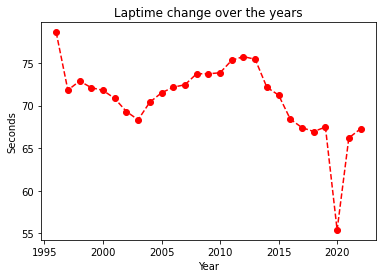

<Figure size 432x288 with 0 Axes>

In [39]:
x = lap_time_changes['year']
y = lap_time_changes['seconds']
plt.xlabel("Year")
plt.ylabel("Seconds")
plt.title("Laptime change over the years")
plt.plot(x, y,'ro--')
plt.show()